In [48]:
import sys
sys.path.insert(0, r'../../../quetzal')
from quetzal.model import stepmodel

import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
training_folder = '../../'
plot_path = training_folder + 'outputs/plot/'

In [50]:
sm = stepmodel.read_zip(training_folder + r'model/base/road_model.zip')
#sm = stepmodel.read_hdf(training_folder + 'model/merged_after.hdf')

read_hdf: 100%|████████████████████████████████████████████████████████████████████████| 27/27 [00:01<00:00, 16.86it/s]


# CLUSTERING

In [51]:
sm.preparation_clusterize_nodes(300) # group_id='parent_station'

# FOOTPATHS

In [52]:
sm.preparation_footpaths(max_length=2000)

# ACCESS AND EGRESS

In [53]:
threshold = 200
sm.preparation_ntlegs(
    short_leg_speed=3,
    long_leg_speed=7,
    threshold=threshold,
    zone_to_transit=True,
    zone_to_road=True,
    n_ntlegs=5
)

# TO ZIP

In [54]:
sm.to_zip(training_folder + 'model/base/walk_model.zip')  

to_hdf(new file): 100%|████████████████████████████████████████████████████████████████| 36/36 [00:03<00:00, 10.23it/s]


# PLOT 
## clustering

In [55]:
def plot_clustering(self, figsize=[25, 25],url=None, *args, **kwargs):
    fig, ax_array = plt.subplots(2, 2,  figsize=figsize, tight_layout=True) 
    plot = sm.plot(
        'disaggregated_nodes', markersize=10, color='green',
        basemap_url=url, title="Original Stops", fontsize=36, ax=ax_array[0][0],
    )
    plot = sm.plot(
        'node_parenthood', linewidth=1,
        ax=sm.plot('disaggregated_nodes',  markersize=10, color='green', ax=ax_array[0][1]),
        basemap_url=url, title="Stop Clusters", fontsize=36
    )
    plot = sm.plot(
        'nodes', color='green', markersize=10,
        ax=sm.plot('node_clusters', alpha=0.25, edgecolor='black', ax=ax_array[1][0]),
        basemap_url=url, title="Stop Clusters", fontsize=36
    )
    plot = sm.plot(
        'nodes', color='green', markersize=50, basemap_url=url,
        title="Aggregated stops", fontsize=36, ax=ax_array[1][1]
    )
    return fig

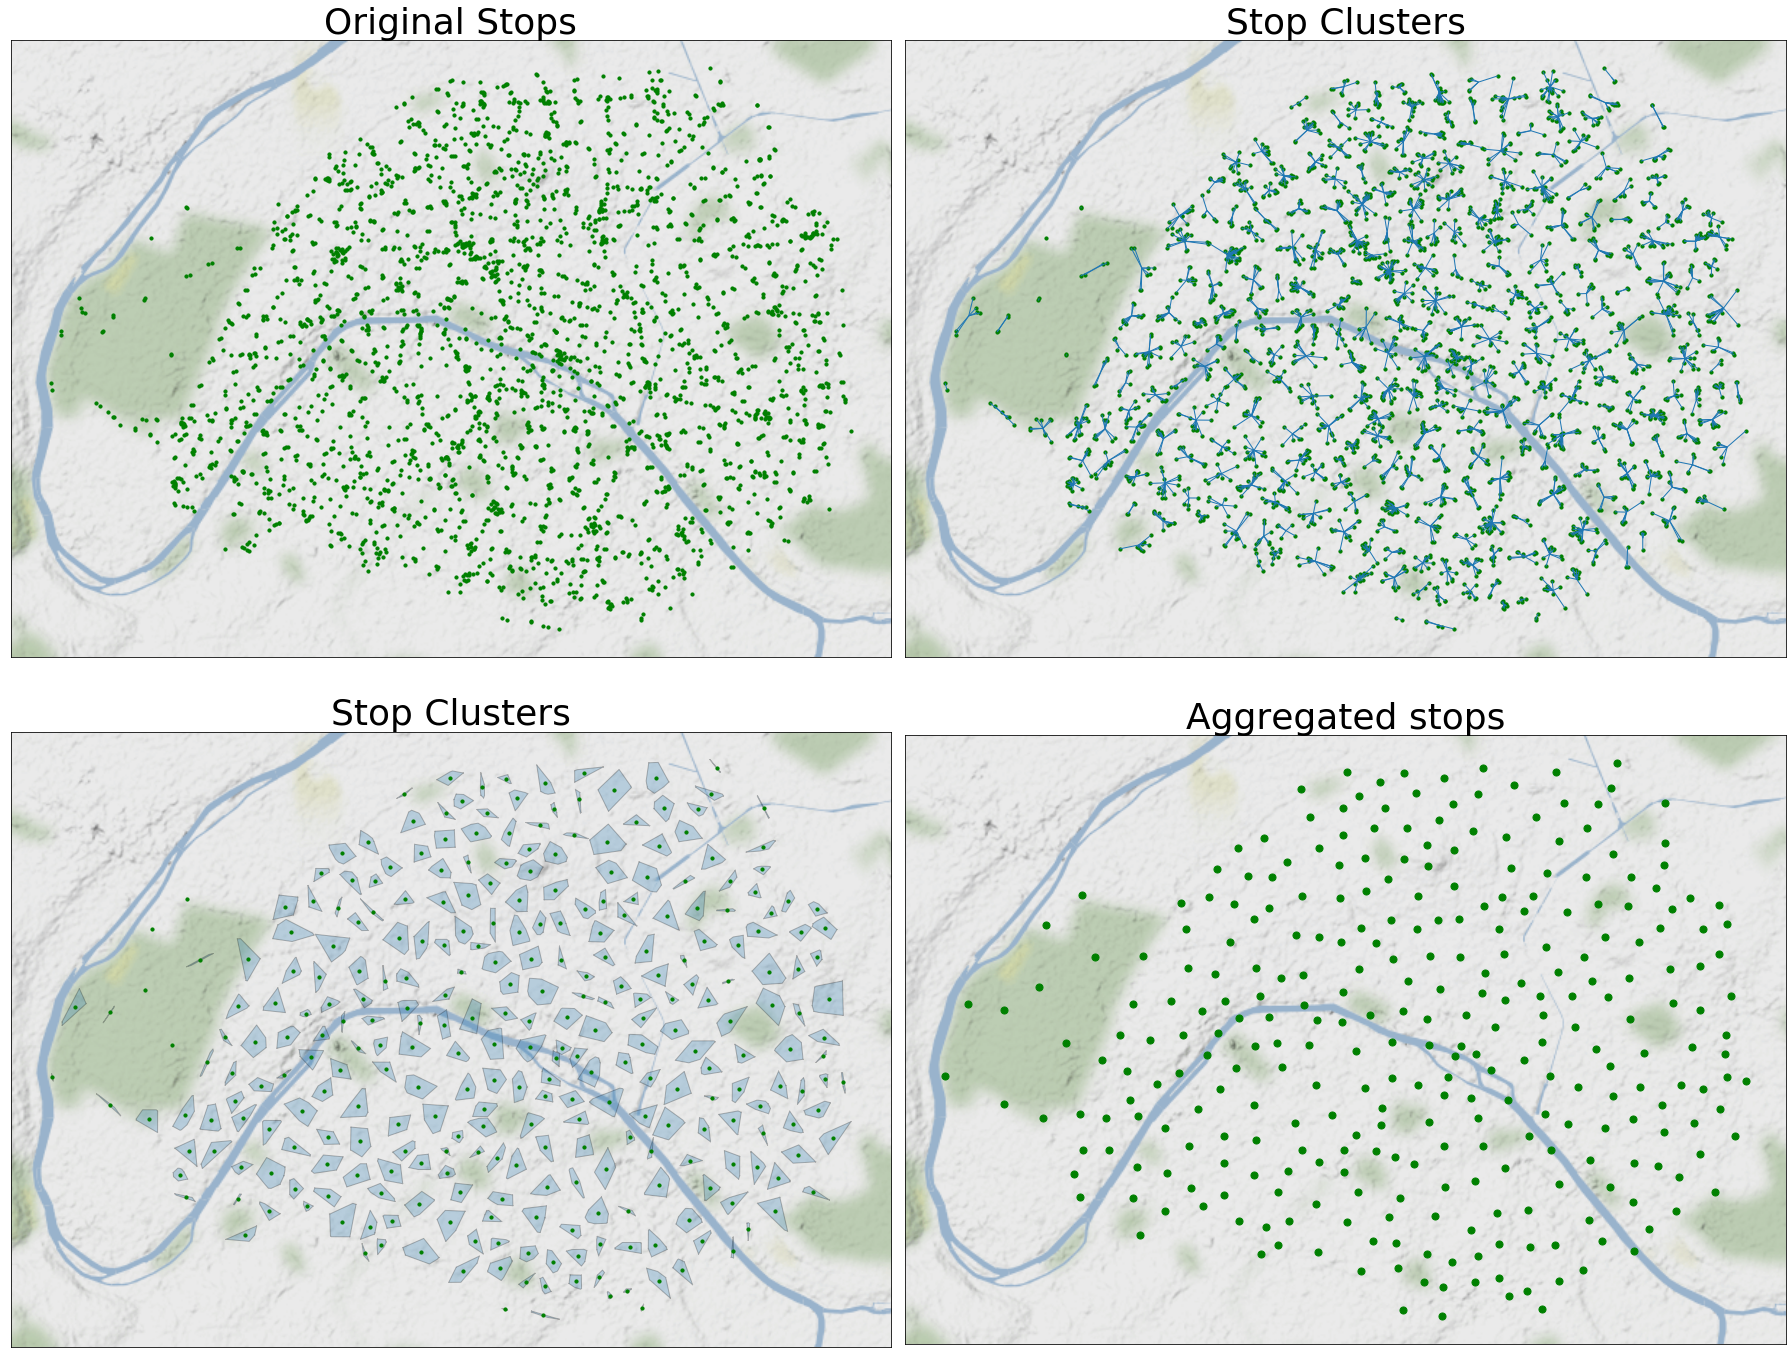

In [56]:
fig = plot_clustering(sm, url='http://tile.stamen.com/terrain-background/tileZ/tileX/tileY.png')

## walk model

In [57]:
def plot_walkmodel(self, figsize=[25, 25],url=None, *args, **kwargs):
    fig, ax_array = plt.subplots(2, 2,  figsize=figsize, tight_layout=True)
    plot = sm.plot('centroids', color='red', markersize=100,
        ax=sm.plot('nodes', markersize=10, color='red',
            ax=sm.plot('zone_to_transit', linewidth=1,
                      ax=sm.plot('zones', linewidth=1, alpha=1, edgecolor='black', color='none', 
                                ax=sm.plot('footpaths', alpha=0, ax=ax_array[0][0])))
        ),
        basemap_url=url,
        title="Acces and Egress links (Zone to Transit)", fontsize=36
    )
    plot = sm.plot(
        'footpaths', color=None, linewidth=1,
        ax=sm.plot('nodes', markersize=100, ax=sm.plot('zones',alpha=0, ax=ax_array[0][1])),
        basemap_url=url, title="Stops & Footpaths", fontsize=36
    )

    plot = sm.plot(
        'footpaths', color=None, linewidth=1,
        ax=sm.plot('zone_to_transit', linewidth=1,  ax=sm.plot('zones',alpha=0, ax=ax_array[1][0]) ),
        basemap_url=url,
        title="Full Pedestrian Graph (as the Crow Flies)", fontsize=36
    )
    plot = sm.plot('road_links', color='green',linewidth=0.5, ax=sm.plot(
        'road_to_transit',  linewidth=1, color='green',
        ax=sm.plot('zone_to_road', linewidth=1, color='green', ax=sm.plot('zones',alpha=0, ax=ax_array[1][1]) )),
        basemap_url=url,
        title="Full Pedestrian Graph (Walk on Road)", fontsize=36
    )
    return fig

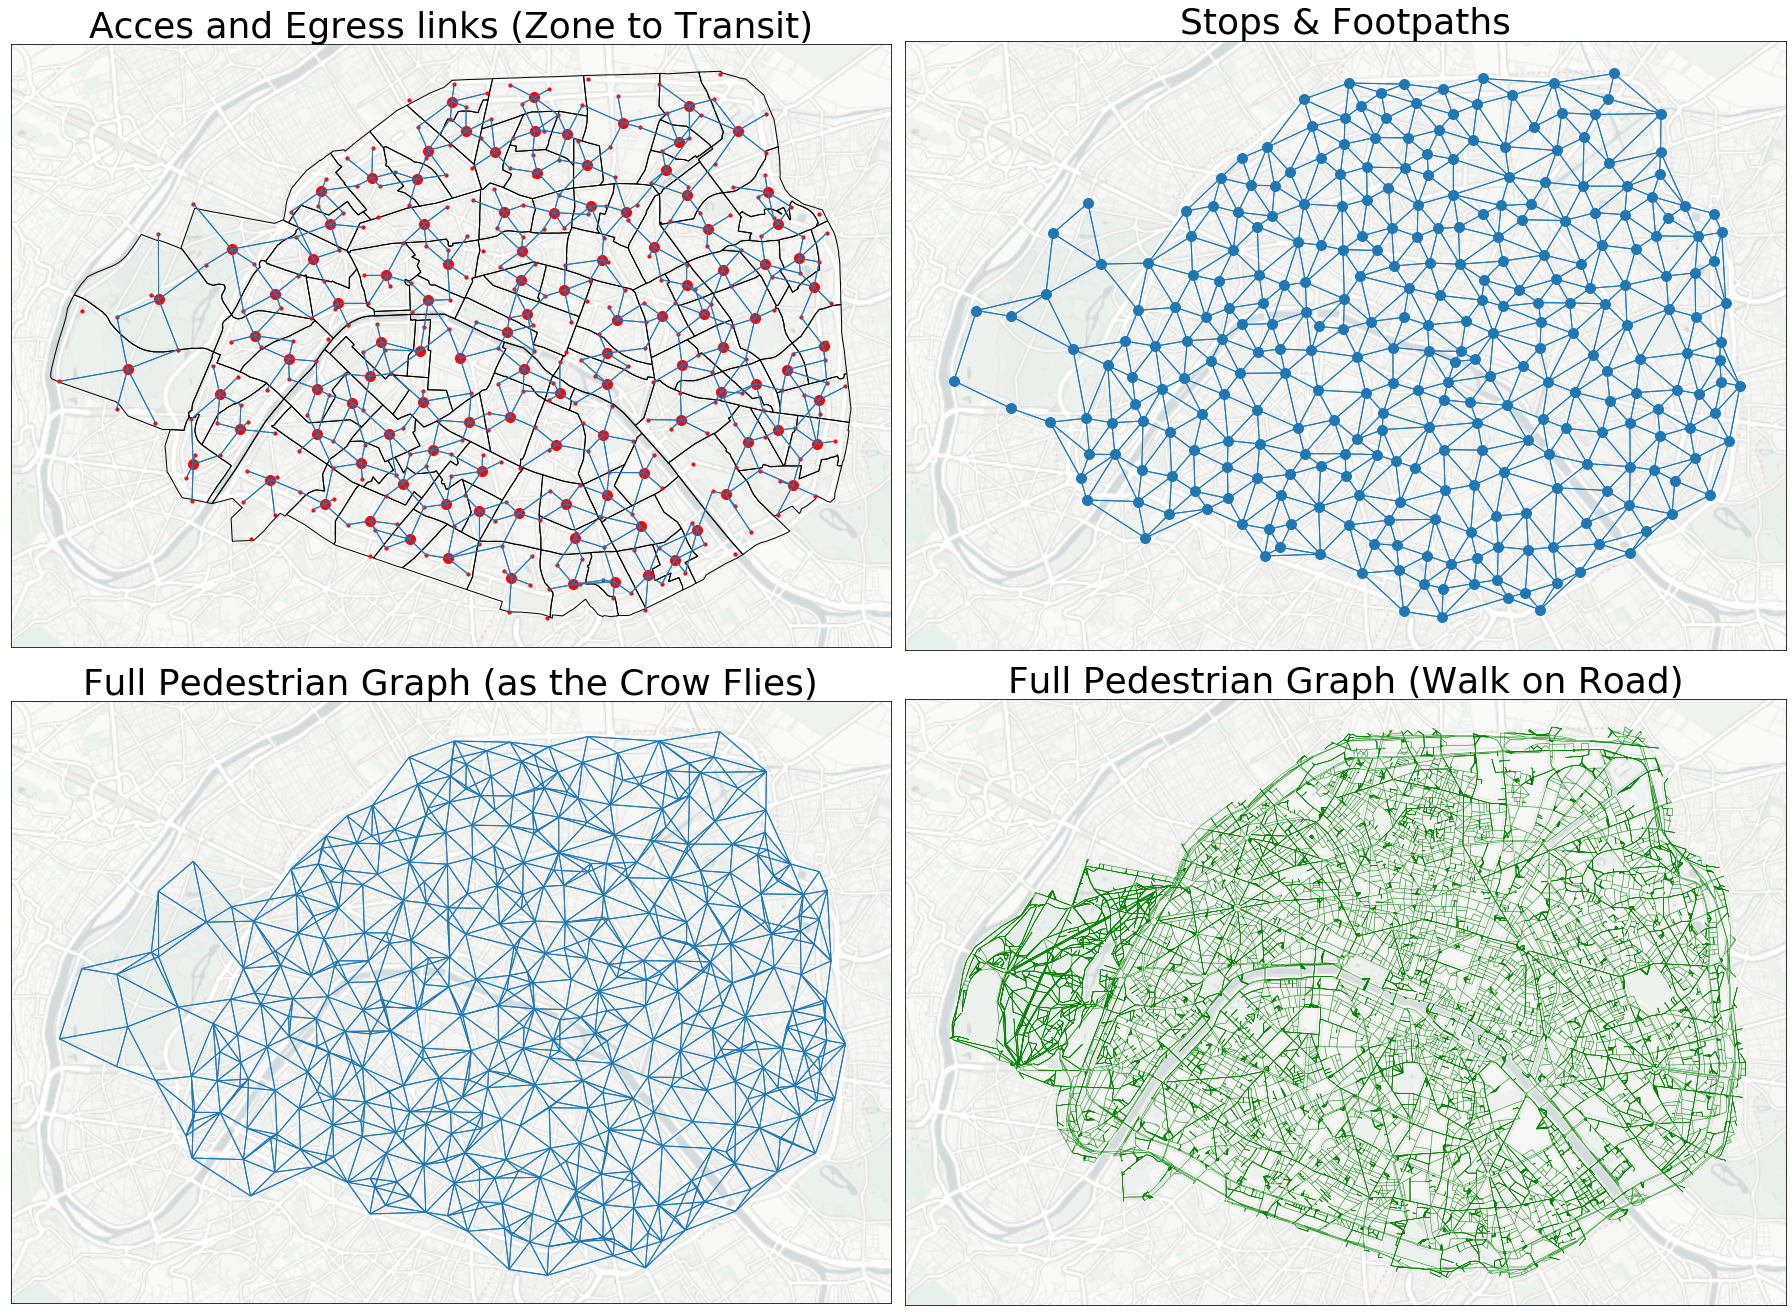

In [58]:
fig = plot_walkmodel(sm, url = 'http://a.basemaps.cartocdn.com/light_nolabels/tileZ/tileX/tileY.png')

# zone_to_transit monitoring

In [59]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Access & egress links: speed VS distance')

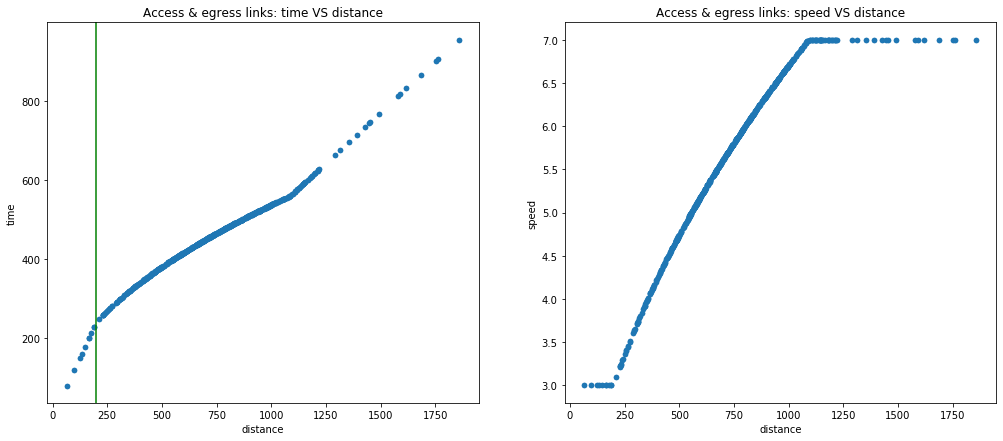

In [60]:
fig, axes = plt.subplots(1, 2, figsize=[17, 7])
ax = sm.zone_to_transit.plot(kind='scatter', x='distance', y='time', ax=axes[0])
ax.axvline(x=threshold, color='green')
ax.set_title('Access & egress links: time VS distance')
ax = sm.zone_to_transit.plot(kind='scatter', x='distance', y='speed', ax=axes[1])
ax.set_title('Access & egress links: speed VS distance')